In [1]:
indir='./results/all_pop'
epoch=312

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fn = f'{indir}/confusion_matrix_epoch{epoch}.csv'
conf_mat = pd.read_csv(fn,header=None)
# print(conf_mat)
conf_mat = np.array(conf_mat)
total = np.sum(conf_mat)
print(total)

# calculate the accuracy
accuracy = np.sum(np.diag(conf_mat)) / total
print(accuracy)

648.0
0.7623456790123457


In [4]:
fn = f'{indir}/confusion_matrix_bubble_epoch{epoch}.csv'

conf_mat = pd.read_csv(fn,header=None)
print(conf_mat)
conf_mat = np.array(conf_mat)
# rows are predicted, columns are expected


      0     1     2     3     4     5     6     7     8     9   ...    16  \
0   52.4   0.0   5.6   0.0   4.8   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   33.3  90.9  11.1   4.2   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2    0.0   9.1  61.1   8.3   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   14.3   0.0  22.2  87.5   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4    0.0   0.0   0.0   0.0  95.2   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5    0.0   0.0   0.0   0.0   0.0  80.6  57.7  12.9  14.3  15.8  ...   0.0   
6    0.0   0.0   0.0   0.0   0.0   8.3  30.8   9.7   4.8   5.3  ...   0.0   
7    0.0   0.0   0.0   0.0   0.0   8.3   7.7  74.2  19.0   0.0  ...   0.0   
8    0.0   0.0   0.0   0.0   0.0   2.8   0.0   3.2  61.9   0.0  ...   0.0   
9    0.0   0.0   0.0   0.0   0.0   0.0   3.8   0.0   0.0  73.7  ...   0.0   
10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
11   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  17.4   

In [5]:
population2int = {
    # EAS
    'CHB': '0',
    'CHS': '1',
    'CDX': '2',
    'KHV': '3',
    'JPT': '4',
    # EUR
    'CEU': '5',
    'GBR': '6',
    'IBS': '7',
    'TSI': '8',
    'FIN': '9',
    # AFR
    'GWD': '10',
    'MSL': '11',
    'LWK': '12',
    'ESN': '13',
    'YRI': '14',
    'ASW': '15',
    'ACB': '16',
    # SAS
    'GIH': '17',
    'PJL': '18',
    'ITU': '19',
    'STU': '20',
    'BEB': '21',
    # AMR
    'PUR': '22',
    'CLM': '23',
    'MXL': '24',
    'PEL': '25',
}

populations = list(population2int.keys())

labels = populations
print(labels)


['CHB', 'CHS', 'CDX', 'KHV', 'JPT', 'CEU', 'GBR', 'IBS', 'TSI', 'FIN', 'GWD', 'MSL', 'LWK', 'ESN', 'YRI', 'ASW', 'ACB', 'GIH', 'PJL', 'ITU', 'STU', 'BEB', 'PUR', 'CLM', 'MXL', 'PEL']


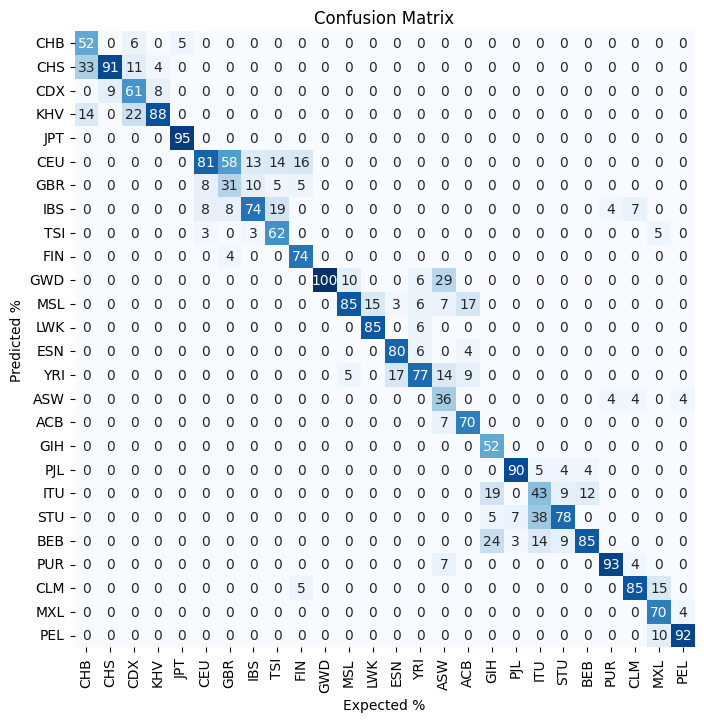

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap='Blues', cbar=False, 
            xticklabels=labels, yticklabels=labels, fmt='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Expected %')
plt.ylabel('Predicted %')
plt.show()

In [7]:
def get_power(df, degree=0):
    # df is a pandas dataframe of shape (n_classes, n_classes)
    # power: among the expected positive, how many are predicted related
    # rows are expected, columns are predicted
    expected_pos = df.iloc[degree, :].sum()
    predicted_pos = df.iloc[:, degree].sum()
    true_pos = df.iloc[degree, degree]
    predicted_unrelated = df.iloc[degree, 0].sum()
    power = 1 - (predicted_unrelated/expected_pos)
    recall = true_pos/expected_pos
    precision = true_pos/predicted_pos
    f1 = 2*precision*recall/(precision+recall)
    return power*100, recall*100, precision*100, f1*100


In [8]:
def get_F1_score(conf_mat):
    # conf_mat is a numpy array of shape (n_classes, n_classes)
    # rows are predicted, columns are expected
    # return a list of F1 scores for each class
    df = conf_mat.T # rows are expected, columns are predicted
    df = pd.DataFrame(df)
    F1_scores = []
    for i in range(df.shape[0]):
        F1_scores.append(get_power(df, i)[3])
    return F1_scores

f1 = get_F1_score(conf_mat)
# remove nan
f1 = [i for i in f1 if not np.isnan(i)]
[print(i,f'{j:.0f}') for i,j in zip(labels, f1)]

overall_F1 = np.mean(f1)
print(f'Overall F1 score: {overall_F1:.1f}')

CHB 64
CHS 76
CDX 68
KHV 78
JPT 98
CEU 57
GBR 39
IBS 67
TSI 72
FIN 83
GWD 82
MSL 73
LWK 89
ESN 84
YRI 70
ASW 49
ACB 79
GIH 69
PJL 89
ITU 47
STU 69
BEB 72
PUR 91
CLM 83
MXL 80
PEL 91
Overall F1 score: 73.8
